# Numpy basic

What data structures have we seen so far ?
lists, tuples, dictionnaries, ...
no real array!

Numpy fixes that. Arrays are data structures where all elements are the same, can be randomly accessed and modified very efficiently.

In [1]:
import numpy as np

## The Array class

In [2]:
# 1-d arrays
a = np.array([1, 2, 3, 4]) # add `dtype=float` to force type
print(type(a)) # numpy.ndarray
print(a)
print(a.dtype)

<class 'numpy.ndarray'>
[1 2 3 4]
int64


In [3]:
# 2-d arrays
A = np.array([ [1., 2., 3.], 
               [4., 5., 6.] ])
print(A)
print(A.shape)
print(len(A.shape))

B = np.array([ [1], 
               [2], 
               [3] ])
print(B)
print(B.shape)

[[1. 2. 3.]
 [4. 5. 6.]]
(2, 3)
2
[[1]
 [2]
 [3]]
(3, 1)


In [4]:
# Indexing & Slicing
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], float)
print(A)
print(A[1,2])
print(A[1:,:2])
print(A[:,1])
print(A[0,:])
print(A[::2,:])

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
6.0
[[ 4.  5.]
 [ 7.  8.]
 [10. 11.]]
[ 2.  5.  8. 11.]
[1. 2. 3.]
[[1. 2. 3.]
 [7. 8. 9.]]


In [5]:
# Reshaping
# Arrays are row major, and that is preserved
A = np.array([[1, 2, 3], [4, 5, 6]], float)
print(A)

B = A.reshape((3, 2))
print(B)

# Using '-1' means "whatever you need to make it work"
C = A.reshape((6, -1))
print(C)

[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]


### Views and Copies

In [6]:
# Notice that slices are views
B = np.array([[1, 2, 3, 4, 5, 6],
              [7, 8, 9, 10, 11, 12]])
print(B)
b = B[:,2]
print(b)
b[0] = 100
print(B)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[3 9]
[[  1   2 100   4   5   6]
 [  7   8   9  10  11  12]]


In [7]:
# Same for reshape
A = np.array([[1, 2, 3], [4, 5, 6]], float)
B = A.reshape((3, 2))
B[0,0] = 1000
print(A)

[[1000.    2.    3.]
 [   4.    5.    6.]]


In [8]:
# You can explicitly copy an array
A = np.array([[1, 2, 3], [4, 5, 6]], float)
B = A.reshape((3, 2)).copy()

B[0,0] = 100
print(A)
print(B)

[[1. 2. 3.]
 [4. 5. 6.]]
[[100.   2.]
 [  3.   4.]
 [  5.   6.]]


## More initialization and manipulation

In [9]:
print(np.arange(10))
print(np.arange(2, 13, 2))
print(np.zeros((2, 3)))
print(np.ones((3, 2)))
print(np.random.rand(3, 2))
print(np.linspace(-1, 2, 5))

[0 1 2 3 4 5 6 7 8 9]
[ 2  4  6  8 10 12]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.94402567 0.82401577]
 [0.49461713 0.10315001]
 [0.310114   0.20672066]]
[-1.   -0.25  0.5   1.25  2.  ]


## Operations on arrays

### Usual math operations

`+, -, *, /, **, %` are all element-wise

In [10]:
# 3x2
A = np.arange(6, dtype=float).reshape((3, 2))
B = np.arange(5, 11, dtype=int).reshape((3, 2))
print(A - B)
print(A * B) 
print(A // B)
print(A / B)

[[-5. -5.]
 [-5. -5.]
 [-5. -5.]]
[[ 0.  6.]
 [14. 24.]
 [36. 50.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.         0.16666667]
 [0.28571429 0.375     ]
 [0.44444444 0.5       ]]


In [11]:
# Sizes have to match
C = np.arange(4).reshape(2, 2)
# print(A * C) # <-- Error

In [12]:
# Inner & Outer products of vectors (1d arrays)
a = np.arange(5)
b = np.arange(5, 10)
# Element-wise
print(a * b)
# Inner product
print(a.dot(b))
# Outer product
print(np.outer(a,b))

[ 0  6 14 24 36]
80
[[ 0  0  0  0  0]
 [ 5  6  7  8  9]
 [10 12 14 16 18]
 [15 18 21 24 27]
 [20 24 28 32 36]]


### Broadcasting

This is the way numpy operate on arrays of different shapes

In [13]:
A = np.arange(10).reshape(2, 5)
print(A.shape)
print(A)

(2, 5)
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [14]:
# With scalar: obvious
b = 2.0
print(A + b)

[[ 2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11.]]


In [15]:
# With other arrays: loop backward from end and match/stretch dimensions
b = np.arange(5)
print(A + b)

[[ 0  2  4  6  8]
 [ 5  7  9 11 13]]


In [16]:
# Sizes have to match
A = np.arange(12).reshape(2, 3, 2)
print(A.shape)
b = np.arange(6).reshape(2, 3) # Won't work
print(b.shape)

# print(A + b)

(2, 3, 2)
(2, 3)


### Other array operations

In [17]:
a = np.arange(10)
print(a.sum())
print(a.mean())
print(a.prod())
print(a.var())
print(a.min())
print(a.max())
print(a.std())
print(a.argmin())
print(a.argmax())

45
4.5
0
8.25
0
9
2.8722813232690143
0
9


### Axis keyword

In [18]:
a = np.arange(6).reshape(2, 3)
print(a)
print(a.sum(axis=0))
print(a.mean(axis=0))
print(a.std(axis=1))

[[0 1 2]
 [3 4 5]]
[3 5 7]
[1.5 2.5 3.5]
[0.81649658 0.81649658]


### Mini-Exercice: normalize data

In [19]:
X = 2 + 3 * np.random.randn(1000, 10)

# TODO: Each row is an observation ; Each column in a feature.
# Normalize the data by removing from each column its mean
# and by dividing each columns by its standard deviation.
# You may need to Google some things, but the result is a one-liner.

In [20]:
#@title Solution
Y = (X - X.mean(axis=0)) / X.std(axis=0)

# Plotting basic

In [21]:
import matplotlib.pyplot as plt

## 1D Line plots

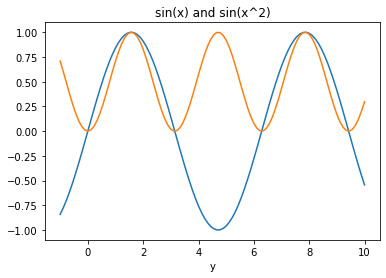

In [22]:
plt.figure()
x = np.linspace(-1, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.plot(x, y**2, )
plt.xlabel("x")
plt.xlabel("y")
plt.title("sin(x) and sin(x^2)")
plt.show()

Text(0, 0.5, 'Gain')

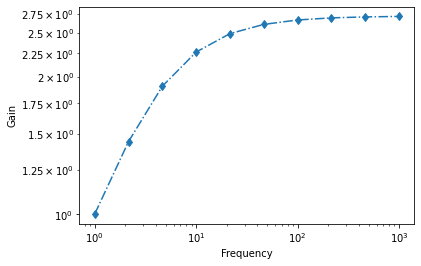

In [23]:
x = np.logspace(0., 3., 10) # 10^0 to 10^3
y = np.exp(np.tanh(0.5*np.log(x)))
plt.loglog(x, y, marker="d", linestyle='-.') # semilogx, semilogy also exist
plt.xlabel("Frequency")
plt.ylabel("Gain")

## 2D Contour plots



Text(0.5, 1.0, 'Velocity field')

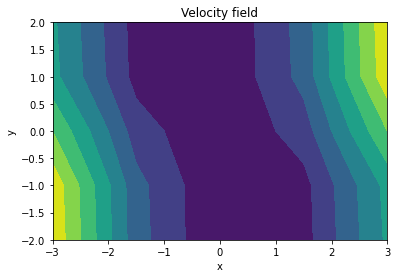

In [24]:
# Create a 2D grid of 10x10 points
x = np.linspace(-3.0, 3.0, 5)
y = np.linspace(-2.0, 2.0, 5)
X, Y = np.meshgrid(x, y)
# Create the Z 2D grid
Z = X**2 + np.sin(Y) * X
# Plot (X,Y,Z)
plt.contourf(X, Y, Z)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Velocity field")

## Exercice: the Mandelbrot fractal

**For the math people (you can skip)**

The Mandelbrot set is formally defined as the set of complex number $M$ such that
$$M = \{x \in \mathbb{C} : \lim_{n \to \infty} |z_n| < \infty | z_0 = 0, z_{n+1} = z_n^2 + x\}$$

Draw the mandelbrot set over the complex plane defined by 
$-2.5 \leq \Re(x) \leq 0.75$, $-1.25 \leq \Im(x) \leq 1.25$ 



In [25]:
import numpy as np

# For x, y two real numbers, returns True is x+iy belongs to the Mandelbrot set
# Otherwise, returns False.
def isInMandelbrot(x,y):
    zn = 0.0 + 1j*0.0 # Complex number
    for it in range(20):
        zn = zn**2 + x + 1j*y
        if abs(zn) > 2:
            return False
    return True


*TODO:*
1. Generate `X` and `Y` grids using `meshgrid` like above. Use 500 points in each dimension. `x` should go from -2.5 to 0.75, and `y` from -1.25 to 1.25. Combine `np.linspace` and `np.meshgrid`
2. Generate a `Val` matrix of the same shape full of zeroes.
3. Iterate through all 500x500 `x,y` points
    - For each `x,y`, call `isInMandelbrot(x,y)`
    - If `isInMandelbrot(x,y)` returns `True`, set `Val` at `x,y` as 1.
6. Plot `(X,Y,Val)` using contourf.

BONUS (Hard): Try to rewrite the `isInMandelbrot` function and your code to avoid the double-loop over `x` and `y`

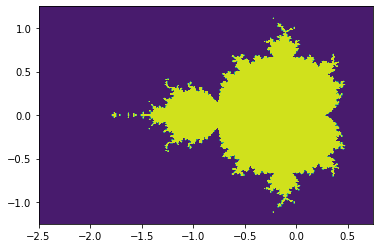

In [26]:
#@title Solution
n = 500
# Generate a grid
x = np.linspace(-2.5, 0.75, n)
y = np.linspace(-1.25, 1.25, n)
X, Y = np.meshgrid(x, y)
Val = np.zeros((n, n))
# For each (x, y)
for i in range(n):
    for j in range(n):
        x = X[i,j]
        y = Y[i,j]
        if isInMandelbrot(x,y):
            Val[i,j] = 1.0
plt.contourf(X, Y, Val)            
        
    

## Exercise: The diet problem

*TO DO*:
- Create the `A` matrix, the `b` and `c` vector like on the slide
- Call `result = scipy.optimize.linprog(c,A_ub=-A,b_ub=-b)`
- Print the solution and interpret it. The actual numbers are in the `result.x`

In [27]:
#@title Solution
import scipy.optimize

b = np.array(
        [150,80]
    )

c = np.array(
        [1.8,2.3,0.5]
    )

A = np.array(
    [
        [107,500,0],
        [72,121,65]
    ])

# min c' x st Ax >= b
res = scipy.optimize.linprog(c,A_ub=-A,b_ub=-b)
print('Corn = {}, Milk = {}, Bread = {}'.format(res.x[0],res.x[1],res.x[2]))


Corn = 5.1109218757906355e-14, Milk = 0.30000000000088917, Bread = 0.6723076923071684


# Extra Numpy Exercices

## Matrix decomposition

From a matrix $A$ of $n$ rows and columns, compute $L$ (lower triangular) and $U$ (upper-triangular) such that 
$A = LU$.

Use the following algorithm.
- For $i = 1,\dots,n$:
    - Build column $i$ of $L$ : for all $j = i,\dots,n$
    $$ L_{ji} = A_{ji} / A_{ii}$$
    - Build row $i$ of $U$: for all $j = i,\dots,n$
    $$U_{ij} = A_{ij}$$ 
    - update remaining part (rows $j = i+1...n$ and columns $k = i+1...n$) of what is left of $A$ by 
    $$A_{jk} = A_{jk} - L_{ji} U_{ik}$$



In [28]:
import numpy as np

# TODO: build a function "LU(A)" 
# (1) Get the number of rows n of A
# (2) Initialize two matrices, L and U, 
#     of size n x n filled with 0's
# (3) Apply the above algorithm to A, L and U.
def LU(A):
    # ...
    pass

In [29]:
#@title Solution
def LU(A):
    n = A.shape[0]
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        for j in range(i,n):
            L[j,i] = A[j,i] / A[i,i]
        for j in range(i,n):
            U[i,j] = A[i,j]
        for j in range(i+1,n):           
            for k in range(i+1,n):
                A[j,k] = A[j,k] - L[j,i] * U[i,k]
    return (L, U) 

In [30]:
#@title Solution
def LU(A):
    n = A.shape[0]
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        for j in range(i,n):
            L[j,i] = A[j,i] / A[i,i]
        for j in range(i,n):
            U[i,j] = A[i,j]
        for j in range(i+1,n):           
            for k in range(i+1,n):
                A[j,k] = A[j,k] - L[j,i] * U[i,k]
    return (L, U) 

## Lower triangular solves
Once we have $A = LU$, we solve $Ax = b$ by
1. Solving $Ly = b$ (forward solve)
2. Solving $Ux = y$ (backward solve)

Step $1$:
- For $i = 1,\dots,n$:
    - $y_i = b_i$
    - For $j = 1,\dots,i-1$:
        - $y_i = y_i - L_{ij} y_j$
        
Step $2$
- For $i = n,\dots,1$:
    - $x_i = y_i$
    - For $j = i+1,\dots,n$:
        - $x_i = x_i - U_{ij} x_j$
    - $x_i = x_i / U_{ii}$
    
Solution is in $x$    

In [31]:
# TODO: building a function "solve(L, U, b)"
# that use L, U and b and return x 
# (1) Get the size n 
# (2) Create empty x and y vectors of size n
# (3) Apply the above algorithm on y
# (4) Apply the above algorithm on x
# (5) Return x
def solve(L, U, b):
    # Implement it here
    pass

In [32]:
#@title Solution
def solve(L, U, b):
    n = A.shape[0]       
    # L (forward)
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i,j] * y[j]
    # U (backward) 
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= U[i,j] * x[j]
        x[i] = x[i] / U[i,i]
    return x

In [33]:
# Run this code to test your LU and solve functions
# Generate A and b
n = 10
A = np.random.rand(n, n)
b = np.random.rand(n)
# Make copies for check after
A_ = A.copy()
b_ = b.copy()
# Factorize and solve using your function
(L, U) = LU(A)     
x = solve(L, U, b) 
# Is is accurate compared to Python's function ?
print("Error (should be < 1e-10): {}".format(np.linalg.norm(x - np.linalg.solve(A_, b_))))

Error (should be < 1e-10): 2.2588068256071973e-14


# Extra Linear Algebra concepts

Most of the "dense" linear algebra routines can be found in scipy.linalg

In [34]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [35]:
A = np.random.randn(10, 5)
B = np.random.randn(8,  5)

# Matrix-Matrix product
C = A.dot(B.T)
print(C.shape)

# The rest is like before
C = np.random.randn(20, 5)
C = C.reshape(10, 10)
D = np.eye(10)
E = C + 10*D

(10, 8)


## QR factorization and least square

Say you are looking for $x$ such that
$$ \| Ax - b \| $$
is minimized, where $A \in R^{m \times n}$ ($m >\!\!> n$).

This can be achieved by computing a (thin-)QR factorization
$$ Q_1 R_1 = A $$
and solving
$$ R_1 x = Q_1^\top b $$

In [36]:
# In python, this is achieved using 
A = np.random.randn(100, 50)
b = A.dot(np.random.randn(50)) + 0.01 * np.random.randn(100) 

# (1) QR
# 'economic' can be replaced by 'full' to compute the full QR factorization
(Q, R) = scipy.linalg.qr(A, mode='economic') 

# (2) Solve
x = scipy.linalg.solve(R, Q.T.dot(b))

# What is the error ?
print("Least square error {}".format( np.linalg.norm( A.dot(x)-b ) / np.linalg.norm(b) )) #~ 1e-3

Least square error 0.0009881049969851308


#### Exercice: linear regression

Say you have $\{x,y\}_{i=1}^N$ data, and you expect $y = a_0 + a_1 x + \epsilon$ where $\epsilon$ is a small noise.

This can be solve using a QR factorization. Simply build the matrix and right-hand side
$$ A = \begin{bmatrix} 1 & x_0 \\
                                          1 & x_1 \\
                                           \vdots \\
                                          1 & x_{N-1} \end{bmatrix} $$
$$ b = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_{N-1} \end{bmatrix} $$
The least-square solution $x$ gives you $a_0$ and $a_1$.

In [37]:
# Generate data {(x_i, y_i)}
N = 100
a_0 = 20.
a_1 = -10.
x = np.random.rand(N)
y = a_0 + a_1 * x + 0.5 * np.random.randn(N)

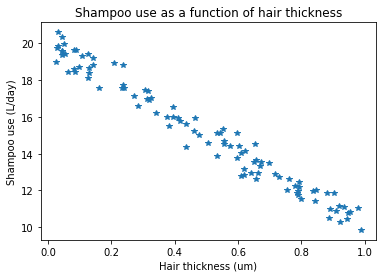

In [38]:
# Plot data
plt.plot(x, y, marker='*', linestyle="")
plt.xlabel("Hair thickness (um)")
plt.ylabel("Shampoo use (L/day)")
plt.title("Shampoo use as a function of hair thickness")
plt.show()

*TODO:*
1. Setup the matrices A = [1, x] and the vector b = [y_1, ..., y_N]
2. Compute Q and R from A (like above)
3. Compute a = R^(-1) (Q^T b) (like above)
4. Use the solution to plot the curve a_0 + a_1 x
5. Add the data points on the plot

*Bonus:*
6. Predic the shampoo use if someone has a hair thickness of 0.7 um

True a: 20.0 -10.0
Recovered a: 20.022268456415993 -9.964651784529718
Prediction for {} um: {} L/day 0.7 13.0


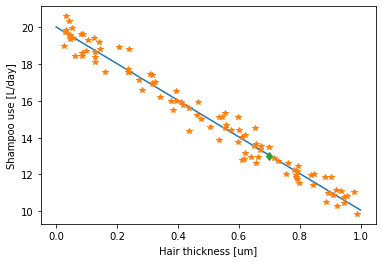

In [39]:
#@title Solution
A = np.ones((N, 2), dtype=float)
A[:,1] = x
b = y

(Q, R) = scipy.linalg.qr(A, mode='economic')
a = scipy.linalg.solve(R, Q.T.dot(b))
print("True a: {} {}\nRecovered a: {} {}".format(a_0, a_1, a[0], a[1]))

xx = np.linspace(0, 1, 100)
yy = a[0] + a[1] * xx
plt.plot(xx, yy)
plt.plot(x, y, marker="*", linestyle='None')
plt.xlabel('Hair thickness [um]')
plt.ylabel('Shampoo use [L/day]')

# Bonus
x_ = 0.7
y_ = a_0 + a_1 * 0.7
print("Prediction for {} um: {} L/day", x_, y_)
plt.plot(x_, y_, marker="d")
plt.show()

## Eigenvalues- and Singular values- Decomposition and Principal Component Analysis

Given $N$ $d-$dimensional feature vectors $x_i$, aranged in a (centered-) $d \times N$ matrix
$$ X = \begin{bmatrix} x_0 & x_1 & \dots & x_{N-1} \end{bmatrix} $$
the leading singular vectors of 
$X$
or the leading eigenvector of 
$X X^\top$
give the principal direction of the data.

Text(0, 0.5, 'Cool level')

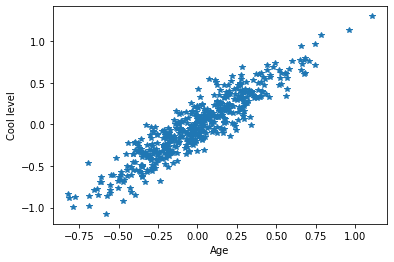

In [40]:
import math

# We can compute
# SVD using scipy.linalg.svd
# EVD using scipy.linalg.eig

# Generate points in 2D
N = 500
angle = 0.65 # <= pi/4
X = np.array([[math.cos(angle),math.sin(angle)],[-math.sin(angle),math.cos(angle)]]).dot(np.diag([0.1, 0.5]).dot(np.random.randn(2, N)))
plt.plot(X[0,:], X[1,:], marker="*", linestyle='None')
plt.xlabel('Age')
plt.ylabel('Cool level')

# TODO: 
# (1) Find leading (first) singular vectors of X
# (2) Plot its direction
# (3) Find leading (first) eigenvectors of X*X^T
# (4) Plot its direction

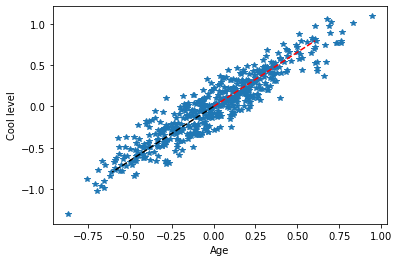

In [41]:
#@title Solution

# Generate points in 2D
N = 500
angle = 0.65 # <= pi/4
X = np.array([[math.cos(angle),math.sin(angle)],[-math.sin(angle),math.cos(angle)]]).dot(np.diag([0.1, 0.5]).dot(np.random.randn(2, N)))
plt.plot(X[0,:], X[1,:], marker="*", linestyle='None')
plt.xlabel('Age')
plt.ylabel('Cool level')

# SVD
(U, s, V) = scipy.linalg.svd(X)
plt.plot([0,U[0,0]],[0,U[1,0]],linestyle="--",color="black");

# EVD
M = X.dot(X.T)
(W, V) = scipy.linalg.eigh(M)
plt.plot([0,V[0,1]],[0,V[1,1]],linestyle="--",color="red");


## Linear Systems


In [42]:
# The simple way
A = np.random.randn(1000, 1000)
b = np.random.randn(1000)
x = scipy.linalg.solve(A,b)

# What if you need to solve a lot of linear systems?
import time
N = 100

# Using Numpy solve 
t0 = time.time()
for i in range(N):
    x = scipy.linalg.solve(A,b)
print("Time using solve {} times: {} sec".format(N, time.time() - t0))

# Using Scipy LU factorization & only using solve after
t0 = time.time()
lu, piv = scipy.linalg.lu_factor(A)
for i in range(N):
    x = scipy.linalg.lu_solve((lu, piv), b)
print("Time using solve {} times: {} sec".format(N, time.time() - t0))   

Time using solve 100 times: 3.7454729080200195 sec
Time using solve 100 times: 0.05447196960449219 sec


### Mini-Exercice: complexity analysis
Mesure the time taken to solve linear systems of size 1000 ... 10 000 (will take some time, about 1-2 minutes).
Plot the time versus size on a log-log plot.
What do you estimate the complexity is ?

In [43]:
# TODO:
# (1) For i = 1000 ... 10 000 (using like 10 samples), generate random A matrix & b vector
# (2) Time the time it takes to call np.linalg.solve(A, b) and record it in a vector
# (3) Plot the time as a function of the matrix size on a loglog plot.

# It will take about 1 minute to run.

Size 1000 Time 0.03462791442871094
Size 1291 Time 0.08424210548400879
Size 1668 Time 0.11189913749694824
Size 2154 Time 0.3067960739135742
Size 2782 Time 0.5882570743560791
Size 3593 Time 0.8778798580169678
Size 4641 Time 2.534061908721924
Size 5994 Time 4.713036775588989
Size 7742 Time 9.031451940536499
Size 10000 Time 18.515003204345703


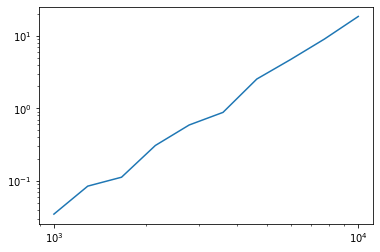

In [44]:
#@title Solution
N = np.logspace(3, 4, 10)
T = np.zeros(10)
for i in range(len(N)):
    n = int(N[i])
    A = np.random.randn(n, n)
    b = np.random.randn(n)
    t0 = time.time()
    x = scipy.linalg.solve(A,b)
    t1 = time.time()
    T[i] = t1 - t0
    print("Size {} Time {}".format(n, T[i]))
plt.loglog(N, T)    